## Import Libraries

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Download necessary resources

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maclan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maclan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maclan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading data

In [3]:
df = pd.read_csv('C:\\Users\\Maclan\\OneDrive\\Desktop\\Assignment 2\\debates_2022.csv')
df.head()

,Unnamed: 0,speaker_name,speaker_role,speaker_party,date,year,debate_title,talk_text
0,81414,Roberta Metsola,NaN,NaN,2022-01-17,2022,Resumption of the session,declaration repeats the session of the europe...
1,81415,Roberta Metsola,NaN,NaN,2022-01-17,2022,Memorial ceremony for President David Maria Sa...,it is with great sadness that today we are pr...
2,81416,Enrico Letta,NaN,NaN,2022-01-17,2022,Memorial ceremony for President David Maria Sa...,secretary of the italian democratic party and...
3,81417,Roberta Metsola,NaN,NaN,2022-01-17,2022,Memorial ceremony for President David Maria Sa...,there will be a musical interlude for a few mi...
4,81418,Charles Michel,NaN,NaN,2022-01-17,2022,Memorial ceremony for President David Maria Sa...,president of the european council. “mr. presi...


In [4]:
texts = df['talk_text']

In [5]:
texts

0         declaration repeats the session of the europe...
1         it is with great sadness that today we are pr...
2         secretary of the italian democratic party and...
3        there will be a musical interlude for a few mi...
4         president of the european council. “mr. presi...
                               ...                        
14492                             that concludes the item.
14493    the minutes of this sitting will be submitted ...
14494    the next part-session will take place from 16–...
14495    let me wish you all merry christmas and happy ...
14496    i declare adjourned the session of the europea...
Name: talk_text, Length: 14497, dtype: object

In [21]:
unique_topics = df['debate_title'].nunique()
unique_topics

701

In [6]:
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Removing non-alphanumeric characters (keeping spaces and letters only)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 3. Tokenization (splitting text into words)
    words = nltk.word_tokenize(text)
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # 5. Lemmatization (to reduce words to their base form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # 6. Join words back into a string
    return ' '.join(words)

# Apply preprocessing to the text data
preprocessed_texts = texts.apply(preprocess_text)

In [7]:
preprocessed_texts

0        declaration repeat session european parliament...
1        great sadness today preparing give last commit...
2        secretary italian democratic party former pres...
3        musical interlude minute musical interlude cel...
4        president european council mr president europe...
                               ...                        
14492                                       concludes item
14493    minute sitting submitted parliament approval b...
14494                  next partsession take place january
14495    let wish merry christmas happy new year behalf...
14496        declare adjourned session european parliament
Name: talk_text, Length: 14497, dtype: object

In [8]:
vectorizer = TfidfVectorizer(
    max_df=0.85,  # Ignore words that appear in more than 85% of documents
    min_df=5,     # Ignore words that appear in less than 5 documents
    ngram_range=(1, 2),  # Use unigrams and bigrams
    stop_words='english'  # Remove common English stopwords
)

In [9]:
X = vectorizer.fit_transform(preprocessed_texts)

In [10]:
X

<14497x47201 sparse matrix of type '<class 'numpy.float64'>'
	with 1605530 stored elements in Compressed Sparse Row format>

In [11]:
print("Features (Top 20):", vectorizer.get_feature_names_out()[:20])

Features (Top 20): ['abandon' 'abandoned' 'abandoning' 'abandonment' 'abd' 'abd elfattah'
 'abdel' 'abducted' 'abduction' 'aber' 'aberration' 'abhorrent' 'abide'
 'abiding' 'ability' 'ability act' 'ability build' 'ability face'
 'ability make' 'ability manage']


In [12]:
# Convert the matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the top few rows of the TF-IDF DataFrame
print(tfidf_df.head())

    abandon  abandoned  abandoning  abandonment  abd  abd elfattah  abdel  \
0  0.000000        0.0         0.0          0.0  0.0           0.0    0.0   
1  0.056970        0.0         0.0          0.0  0.0           0.0    0.0   
2  0.017682        0.0         0.0          0.0  0.0           0.0    0.0   
3  0.000000        0.0         0.0          0.0  0.0           0.0    0.0   
4  0.000000        0.0         0.0          0.0  0.0           0.0    0.0   

   abducted  abduction  aber  ...  zeroemission vehicle  zerotolerance  \
0       0.0        0.0   0.0  ...                   0.0            0.0   
1       0.0        0.0   0.0  ...                   0.0            0.0   
2       0.0        0.0   0.0  ...                   0.0            0.0   
3       0.0        0.0   0.0  ...                   0.0            0.0   
4       0.0        0.0   0.0  ...                   0.0            0.0   

   zimbabwe  zimniok  ziobro  zloty  zone  zovko   zu  zum  
0       0.0      0.0     0.0   

In [34]:
tfidf_df.shape

(14497, 47201)

# Question 2

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Clustering using K-Means
num_clusters = 89  # Set the number of clusters (You can adjust this based on evaluation metrics)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Evaluate clustering using silhouette score
sil_score = silhouette_score(X, labels)

# Show the results
print(f"Silhouette Score: {sil_score}")

# Extract the top 10 words for each cluster
#order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names_out()

# Display the top 10 words in each cluster
#for i in range(num_clusters):
#    print(f"Cluster {i+1} top 10 words:")
#    top_words = [terms[ind] for ind in order_centroids[i, :10]]
#    print(", ".join(top_words))
#    print("\n")

Silhouette Score: 0.021332512958355285


In [35]:
num_clusters = 79  # Set the number of clusters (You can adjust this based on evaluation metrics)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Evaluate clustering using silhouette score
sil_score = silhouette_score(X, labels)

# Show the results
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.01934979279730923


In [40]:
num_clusters = 141  # Set the number of clusters (You can adjust this based on evaluation metrics)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Evaluate clustering using silhouette score
sil_score = silhouette_score(X, labels)

# Show the results
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.025902592804124765


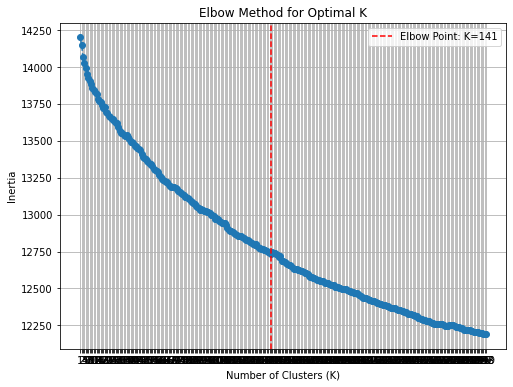

Optimal number of clusters (elbow point): 141


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of clusters to try
k_range = range(1, 300)

# List to store inertia values for each K
inertia = []

# Calculate inertia for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Set n_jobs=1 to disable parallelism
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Calculate the first derivative (difference between successive inertia values)
inertia_diff = np.diff(inertia)

# Find the index where the first derivative decreases the most (elbow point)
elbow_point = np.argmax(inertia_diff) + 1  # Adding 1 because the first diff is one less than the actual K

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f"Elbow Point: K={elbow_point}")
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

print(f"Optimal number of clusters (elbow point): {elbow_point}")

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # Use cosine similarity for text data
labels = dbscan.fit_predict(X)

# Evaluate clustering using silhouette score (only for clusters, ignoring noise points)
# Noise points are labeled as -1 by DBSCAN
valid_labels = labels[labels != -1]
valid_X = X[labels != -1]

sil_score = silhouette_score(valid_X, valid_labels, metric='cosine')

# Print results
print(f"Silhouette Score for DBSCAN (ignoring noise points): {sil_score}")

# Display the cluster labels for each document
print("Cluster labels:", labels)

Silhouette Score for DBSCAN (ignoring noise points): 0.38378826474129096
Cluster labels: [ 0 -1 -1 ... -1 -1 28]


In [30]:
labels.shape

(14497,)

In [31]:
unique_labels = np.unique(labels)

# Get the number of clusters (excluding noise if desired)
num_clusters = len(unique_labels)  # Including noise
num_clusters_excluding_noise = len(unique_labels[unique_labels != -1])  # Excluding noise

print(f"Total number of labels (clusters including noise): {num_clusters}")
print(f"Total number of clusters (excluding noise): {num_clusters_excluding_noise}")

Total number of labels (clusters including noise): 80
Total number of clusters (excluding noise): 79


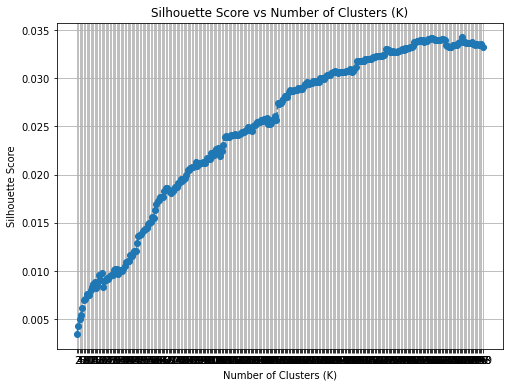

Optimal number of clusters based on Silhouette Score: 284


In [38]:
k_range = range(2, 300)  # You can extend this range if needed

# List to store silhouette scores for each K
sil_scores = []

# Calculate Silhouette Score for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Plot the Silhouette Score vs K
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the best K (with the highest silhouette score)
best_k = k_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {best_k}")